# STAT 628 Project 1

## I. Introduction:

**Background:** The body fat percentage (BFP) of a human or other living being is the total mass of fat divided by total body mass, times 100; body fat includes essential body fat and storage body fat. Essential body fat is necessary to maintain life and reproductive functions[1].
 
**Movtivation:** To make a simple method and predict Bodyfat percantage succinctly, here we try to build some statistical models to do the prediction.
 
**Thesis Statement:** After comparision, We conduct a three-feature simple linear regression model selected by Stepwise BIC. Three features selected are *HEIGHT*, *ABDOMEN* and *WRIST*.

## II.Data Summary and Cleaning:

**Data Summary:** Our dataset contains measurements from 252 men with their accurate bodyfat percantage and some other body indexes.

**Data Cleaning:** 
1. Deleting features: We exclude two features. First, looking at the plot of BODYFAT vs DENSITY, we find that DENSITY is inverisely proportional to BODYFAT which implies strong linear relation. Thus, we delet DENSITY and chose BODYFAT as our response variable since it has larger spread. Second, ADIPOSITY is a function of hip and height which are already including in our dataset. To meet with laymen rules, we exclude it properly.
2. To process the data, we firstly use studentized residuals and Cook's distance methods to pick out some candidates. Furthermore, we look into these samples to see if it is reasonable to delete them or not.

In [10]:
library(IRdisplay)

display_html(
'<script>  
code_show=true; 
function code_toggle() {
  if (code_show){
    $(\'div.input\').hide();
  } else {
    $(\'div.input\').show();
  }
  code_show = !code_show
}  
$( document ).ready(code_toggle);
</script>
  <form action="javascript:code_toggle()">
    <input type="submit" value="Click here to toggle on/off the raw code.">
 </form>'
)

bodyfat=read.csv("bodyfat.csv",header=T)
bodyfat[c(39,42,182),]

,IDNO,BODYFAT,DENSITY,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
39,39,33.8,1.0202,46,363.15,72.25,48.9,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
42,42,31.7,1.0250,44,205.00,29.50,29.9,36.6,106.0,104.3,115.5,70.6,42.5,23.7,33.6,28.7,17.4
182,182,0.0,1.1089,40,118.50,68.00,18.1,33.8,79.3,69.4,85.0,47.2,33.5,20.2,27.7,24.6,16.5


According to the outlier test, we decide to delete all three points, which are the 39th, 42th and 182th points respectively.
1. **39th:** This point is checked as **outlier** by outlier test and the weight of this person is far away from average level, which means there is a big chance for this person to be mismeasured.
2. **42th:** This point is checked as **outlier** by outlier test and the height of this person is far away from average level,which means there is a big chance for this person to be mismeasured.
3. **182th:** This point is checked as **outlier** by outlier test, mainly because the bodyfat of this person is 0.

## III. Model Selection:

### 1. Methodology

**Linear regression:** For linear regressiong model, we need to select features for modling. Bassically, we use:
1. Lasso method: does k-fold cross-validation on data set, produces a plot, and returns best lambda
2. Mallow's Cp: Performs an exhaustive search for the best subsets of the variables in x for predicting y in linear regression, using an efficient branch-and-bound algorithm 
3. Stepwise algorithm: Select model based on AIC or BIC by stepwise algorithm, i.e. in this case, from full model to constant model. Here we compare "backward" method with "both" method

**Regression tree:** (constant and linear):Three different regression tree models are implemented on the BODYFAT dataset, which are constant regression tree, linear regression tree and random forest respectively.

*Note:* However, since there is no use of BIC on assessing regression tree model, we still have to perform cross validation on both of them.

###  2. Summary Table for Model Selection

<table>
  <tr>
    <th>Models</th>
    <th>LASSO</th>
    <th>Mallow's cp</th>
    <th>Stepwise AIC</th>
    <th>Stepwise BIC</th>
    <th>Regression tree(constant)</th>
    <th>Regression tree(linear)</th>
    <th>Random forest</th>
  </tr>
  <tr>
    <td>BIC</td>
    <td>1419.261</td>
    <td>1421.831</td>
    <td>1428.425</td>
    <td>1419.037*</td>
    <td>-</td>
    <td>-</td>
    <td>-</td>
  </tr>
  <tr>
    <td>MSE (CV)</td>
    <td>-</td>
    <td>-</td>
    <td>-</td>
    <td>16.386*</td>
    <td>25.389</td>
    <td>16.787</td>
    <td>18.845</td>
  </tr>
  <tr>
    <td>Number of Features</td>
    <td>4</td>
    <td>5</td>
    <td>7</td>
    <td>3</td>
    <td>2</td>
    <td>-</td>
    <td>-</td>
  </tr>
</table>

As the table shown above, model selected by BIC has the minimum MSE(CV) and BIC while the constant regression tree has the minimum number of features.

1. the MSE of the model selected by BIC ranks the 1st in the ascending order
2. the number of features of BIC model ranks the 2nd in the ascending order
3. the BIC of the model selected by stepwise BIC ranks 1st in the ascending order

Considering overall the MSEs ,numbers of features selected and BIC, the model selected by stepwise BIC ranks 1st among all of the models, althought it doesn't own the minimum number of features.

### 3. Model Statement

The simple linear regression model selected by BIC is:
$$BODYFAT = \beta_0+\beta_1 \cdot HEIGHT + \beta_2 \cdot ABDOMEN + \beta_3 \cdot WRIST + \epsilon,~~~~~\epsilon \sim N(0,\sigma^2)$$

The assumptions of this model are as follows:

1. The mean of the response , $E(Y_i)$, at each value of the predictor, $x_i$, is a **linear** function of the $x_i$.
2. The errors, $ε_i$, are **iid** (independent and identically distributed).
3. The parameters $\beta_i$ are **constant**.
4. The predictors $X$ are assumed to be **fixed**.

### 4. Model Summary

<table>
  <tr>
    <th>parameters</th>
    <th>Estiamte (95% Confidence Interval)</th>
    <th>Standard Error</th>
    <th>t Value</th>
    <th>P Value</th>
  </tr>
  <tr>
    <td>(intercept)</td>
    <td>9.14 (-5.24, 23.5)</td>
    <td>7.31</td>
    <td>1.25</td>
    <td>0.21</td>
  </tr>
  <tr>
    <td>HEIGHT</td>
    <td>-0.40 (-0.60, -0.19)</td>
    <td>0.11</td>
    <td>-3.76</td>
    <td>&lt;0.001***</td>
  </tr>
  <tr>
    <td>ABDOMEN</td>
    <td>0.72 (0.66, 0.78)</td>
    <td>0.03</td>
    <td>23.02</td>
    <td>&lt;0.001***</td>
  </tr>
  <tr>
    <td>WRIST</td>
    <td>-1.58(-2.30, -0.84)</td>
    <td>0.37</td>
    <td>-4.24</td>
    <td>&lt;0.001***</td>
  </tr>
</table>


According to the above table, the equation below can be used to predict the precent of $BODYFAT$
$$BODYFAT = 9.14- 0.40 \cdot HEIGHT + 0.72 \cdot ABDOMEN + -1.58 \cdot WRIST$$

**Parameter Explaination:**
1. $INTERCEPT$: 9.14, but since all X in this model is non-zero in practice, there is no useful meaning of intercept.
2. $HEIGHT$ : -0.40, which means for each one inch increase of height, the mean body fat is expected to decrease by 0.40, holding other X constant.
3. $ABDOMEN$ : 0.72, which indicates for each unit increase of abodomen, the mean body fat is expected to increase by 0.72, holding other X constant.
4. $WRIST$ : -1.58, which means for each one centimeter increase of wrist, the mean body fat is expected to decrease by 1.58, holding other X constant.

**Confidence Interval:**

The $95\%$ confidence interval means there is a $95\%$ chance that the interval contains the true value of the parameter. 

What worth to mention is that all confidence intervals of three parameters don't contain 0, which is a strong evidence that all three parameters are statistically significant in $95\%$ level.

**Hypothesis Testing (t-test):**

The null hypothesis is that the $i$th parameter is not related to the $BODYFAT$. 
$$ H_0: \beta_i = 0 ~ vs ~ H_a: \beta_i \neq 0 $$

The P-values of the three parameters are all less than 0.001, meaning that for each parameter there is a $99\%$ chance to say it's  related to the $BODYFAT$.

**Standard Error:**

The standard error represents the average distance that the observed values fall from the regression line. 

In this model, standard error euqals to 3.988, which means that the average distance of the data points from the fitted line is about 4% body fat.

**R-square:**

The multiple R-square equals to 0.7282, which means approximatly $73\%$ of the variance of the $BODYFAT$ can be explained by this model.

 ###  5.Diagnositcs:
 After choosing the model, we do some diagnoses to examine our model. Basically, we consider about: **Gaussian-Markov assumptions**, **homoscedasticity**, **features' collinearity**.

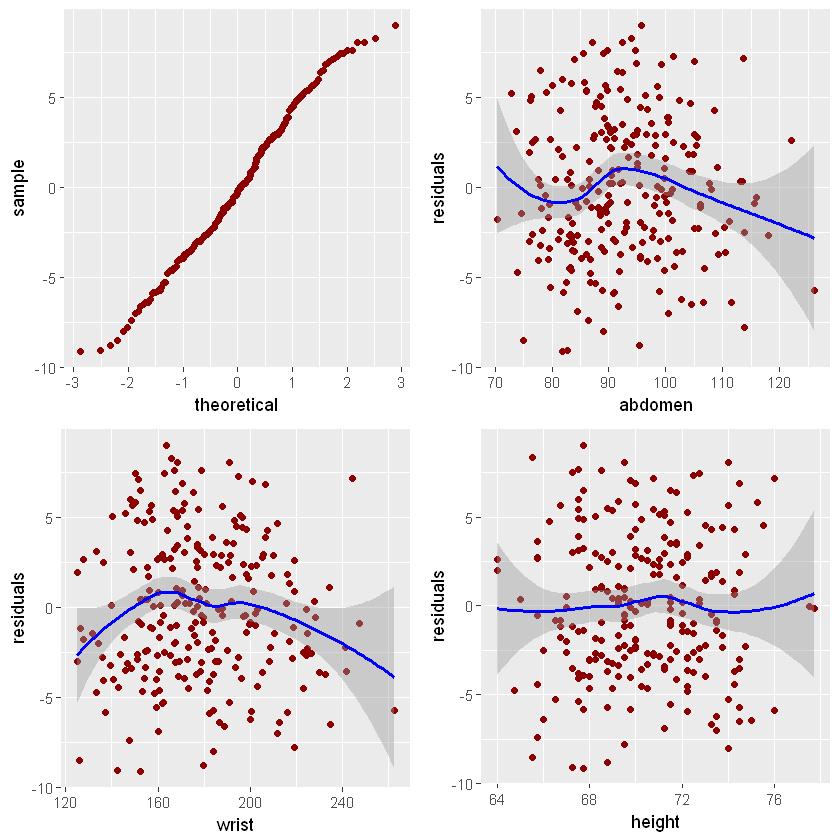

In [11]:
bodyfat = bodyfat[-c(39,42,182),]
model.BIC = lm(BODYFAT~ HEIGHT +ABDOMEN+WRIST, data= bodyfat)
library(ggplot2)
library(grid)
abdomen = bodyfat$ABDOMEN
wrist = bodyfat$WEIGHT
height = bodyfat$HEIGHT
residuals = model.BIC$residuals

df = data.frame(y = model.BIC$residuals)
a = ggplot(df, aes(sample = y))+ stat_qq()+ geom_point(stat = "qq",color = "darkred")

b = ggplot(data=NULL, aes(x = abdomen, y = residuals)) + 
  geom_point(color = "darkred") + geom_smooth(color = "blue",method = 'loess') 

c = ggplot(data=NULL, aes(x = wrist, y = residuals)) + 
  geom_point(color = "darkred") + geom_smooth(color = "blue",method = 'loess') 

d = ggplot(data=NULL, aes(x = height, y = residuals)) + 
  geom_point(color = "darkred") + geom_smooth(color = "blue",method = 'loess') 

grid.newpage()  
pushViewport(viewport(layout = grid.layout(2,2)))
vplayout <- function(x,y){
  viewport(layout.pos.row = x, layout.pos.col = y)
}
print(a, vp = vplayout(1,1))   
print(b, vp = vplayout(1,2))   
print(c, vp = vplayout(2,1))  
print(d, vp = vplayout(2,2))

#### a.Gaussian-Markov assumptions:
 First, about the Gaussian-Markov assumptions,looking at the plot, all points are distributed aournd the diagonal. Besides, both tails are not heavy. We can say that our origin dataset is basically normally distributed which means that our assumptions holds.
 
#### b. Collinearity:
 when consider about features' collinearity, we mainly use the VIF index here:
 <table>
  <tr>
    <th>Features</th>
    <th>SquareVIF</th>
    <th>Collinearity</th>
  </tr>
  <tr>
    <td>HEIGHT</td>
    <td>1.091</td>
    <td>FALSE</td>
  </tr>
  <tr>
    <td>ABDOMEN</td>
    <td>1.248</td>
    <td>FALSE</td>
  </tr>
  <tr>
    <td>WRIST</td>
    <td>1.335</td>
    <td>FALSE</td>
  </tr>
</table>

Generally, if VIF is samller than 10 we will consider them do not have very strong collinearity. Since here all of their VIF is lower than 2, those features are quite good which means they do not have strong collinearity. 

#### c.  Residual plot:
The results of residual plot shows that the expectation of residuals is around 0, besides the variation is constant. Above all we claim that Gaussian-Markov assumption is tenable in our model.

##  IV. Final explain:
Finally, our model is :
$$BodyFat ~= 9.14 ~-0.40~ Height~+ 0.72~Abdomen~ -1.58~Wrist $$

#### A. Rule of thumb:
In a nutshell, if you want to calculate your bodyfat, we would suggest you to:

$"multiply ~your ~abdomen ~by ~0.7, ~add ~9 , ~then ~subtract~ it~ with~ your~ height~ multiply~ with~ 0.4, ~also~ substract~ it~with~your~ wrist~ multiply~ by~ 1.6"$

*Note that in our model, the unit for height is *Inch*, and the unit for abdomen and wrist is *centimeter*.*

**Example Usage:** For an oridinary man with mean height, abdomen and wrist(eg. height 69.75 inch, abdomen 90.7 cm and wrist 17.7 cm), the predicted value of bodyfat is around 18.75%. There is a 95% probability that his bodyfat is between 10.87% and 26.62%.

With the rule of thumb, the predicted bodyfat is 16.27%.

#### B. Inference about the relationship:
From our data processing and modling, there is a clearly linear relationship between body fat and our three features. It is very reasonable that we fit the linear model to predict Body percentage. According to the standarized R squared, our model has explained about 72.82% about all the variation in bodyfat.
Besides, consider that for each year, the wrist and height may not change very much, the Abdomen changes will leads the changes for bodyfat percentage.
#### C. Strengths and Weakness of model: 
We hold the opinion that after selecting Height+Abdomen+Wrist as significant variables, our SLR model tends to be a reasonable model.
1. **Linearity:** Based on our diagnoses with plots, the linearity for our model basically holds.
2. **Additivity:** It is possible that the 3 predictors have interaction effects, i.e. a person with large belly is very likely to have fat wrist. By definition,
$$\mu_y =f_1(x_1)+f_2(x_2)+...+f_{p−1}(x{p−1})$$
 the trun mean of bodyfat could be expressed as a sum of linear combinations. Thus, the additiviy may not hold well and it is still reasonable in this case.
3. **Constant effects:** This one is reasonable, since for ordinary persons, they should have a baseline for bodyfat percantage. In our model, it is 9.0%. According to Wiki, the normal percantage is 18%-22% for men. This proves our toughts. 
4. **Fixed X:** Intuitively the magnititude of X will not change too much under same measurement even if we test it multiple times.
5. **Normally distributed errors:** Through there is a little tail in our QQ-plots, the plot still shows that our dataset holds this assumption.
6. **Constant variance:** From the residual plot, we can tell that the mean of variance acts very smooth. We can basically consider it as constant.
7. **The precision of our body fat estimation:** As shown above, our model has explain approxmately 73% variation in bodyfat variation. It seems quite accurate.

***Overall, our model has already given a good way to predict bodyfat percentage based on owned data. After all kinds of tests we can tell that our model fits well and meets majority of assumptions such as, SLR assumptions,Collinearity,Collinearity,Homoscedasticity. When testing our model on some new examples, it acts quite good under comparison with some existed models.***


## Distributions for group members:

1. *Stephen Wang: Data cleaning, background infomation research, outlier test, modeling(LASSO, Mallow's cp)*
2. *Hanmo Li: Data Cleaning, modeling(regression tree), model selection*
3. *Wen Huang: Data cleaning, modeling(AIC,BIC), diagnose, model summary*
4. *Ruidong Lan: Data cleaning, modeling(AIC, BIC), model summary*